In [1]:
#Import Modules
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cross_validation import train_test_split, cross_val_score

C:\Users\Vicolas\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Import datasets
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


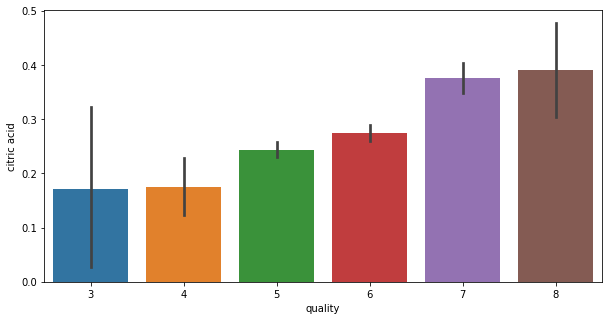

In [4]:
plt.figure(figsize=(10,5))
sns.barplot(x='quality',y='citric acid', data=wine)

In [5]:
#Coverting the depending variable/outcome to binary classification
wine['quality'] = wine['quality'].apply(lambda x: x >= 6.5)

In [6]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False


In [7]:
encoder = LabelEncoder()

In [8]:
wine['quality'] = encoder.fit_transform(wine['quality'])

In [9]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [10]:
X = wine.iloc[:,:11]
y = wine.iloc[:,-1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [12]:
#Feature Scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

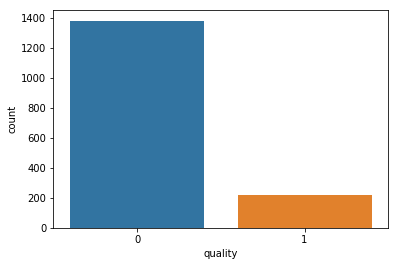

In [13]:
sns.countplot(wine['quality'])

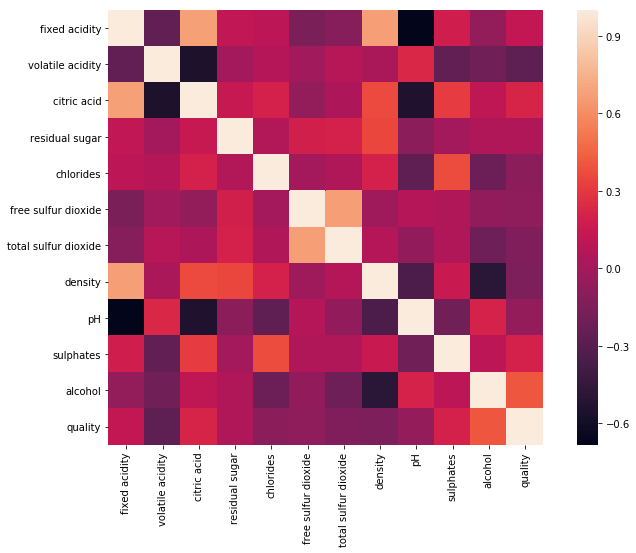

In [14]:
corr = wine.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, square=True)

In [ ]:
['fixed acidity', 'citric acid', 'residual sugar', 'sulphates', 'alcohol', 'quality']

### MODELING

In [15]:
#Logistics Regression Classifier
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_pred = model.predict(X_test)

In [17]:
classReport = classification_report(y_test, y_pred)
print(classReport)

             precision    recall  f1-score   support

          0       0.93      0.95      0.94       355
          1       0.50      0.40      0.44        45

avg / total       0.88      0.89      0.88       400



In [18]:
print(confusion_matrix(y_test, y_pred))

[[337  18]
 [ 27  18]]


In [19]:
#Random Forest Classifier
modelRF = RandomForestClassifier(n_estimators=200)
modelRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
y_predRF = modelRF.predict(X_test)

In [21]:
print(classification_report(y_test, y_predRF))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       355
          1       0.63      0.49      0.55        45

avg / total       0.90      0.91      0.91       400



In [22]:
print(confusion_matrix(y_test, y_predRF))

[[342  13]
 [ 23  22]]


In [23]:
#Support Vector Classifier (SVC)
modelSVC = SVC()
modelSVC.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
y_predSVC = modelSVC.predict(X_test)

In [25]:
print(classification_report(y_test, y_predSVC))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95       355
          1       0.73      0.36      0.48        45

avg / total       0.90      0.91      0.90       400



In [26]:
print(confusion_matrix(y_test, y_predSVC))

[[349   6]
 [ 29  16]]


In [30]:
quality = []
for i in wine.columns:
    if not i in ["pH", "density","total sulfur dioxide","free sulfur dioxide","chlorides","volatile acidity"]:
        quality.append(i)
print(quality)

['fixed acidity', 'citric acid', 'residual sugar', 'sulphates', 'alcohol', 'quality']
